# Project 02 - Image Processing

## Student Information

- Full name: Nguyễn Văn Lê Bá Thành
- Student ID: 22127390
- Class: 22CLC08

## Required Libraries

In [61]:
# IMPORT YOUR LIBS HERE
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Function Definitions

In [62]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    raw_image = Image.open(img_path)
    return raw_image

def show_img(img):
    '''
    Show image
    
    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img)
    plt.show()


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img.save(img_path)


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def change_brightness(img, brightness):
    '''
    Perform brightness adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image
    brightness : int
        Brightness value
    
    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    # Convert image into a higher precision data type
    img = img.astype(np.float32)

    # Perform brightness adjustment
    result = np.clip(img + brightness, 0, 255)

    return result

def change_contrast (img, contrast):
    '''
    Perform contrast adjustment

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image
    contrast : int
        Contrast value
    
    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    # Convert image into a higher precision data type
    img = img.astype(np.float32)
    
    # Calculate factor between dark and bright color
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    
    # Perform contrast adjustment
    result = np.clip(factor * (img - 128) + 128, 0, 255)

    return result

def flip_img(img, direction):
    '''
    Perform flip horizontal or vectical

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image
    direction : str
        Direction to flip image
    
    Returns
    -------
    flipped_arr : numpy.ndarry
        Flipped array (2D) image
    '''
    # Flip image vertically
    if direction == 'vertical':
        flipped_arr = img[::-1, :]
        return flipped_arr
    
    # Flip image horizontally
    elif direction == 'horizontal':
        flipped_arr = img[:, ::-1]
        return flipped_arr

def convert_to_grayscale (img):
    '''
    Perform convert RGB image to grayscale image

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    stacked_greyscale_img : numpy.ndarry
        Greyscale (2D) image
    '''
    # Define the weight vector
    weight = np.array([0.299, 0.587, 0.114])

    # Perform matrix multiply
    result = np.matmul(img, weight)

    # Convert 1 channel to 3 channels
    stacked_greyscale_img = np.stack((result,)*3, axis=-1)

    return stacked_greyscale_img

def convert_to_sephia (img):
    '''
    Perform convert RGB image to sephia image

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    # Create weight matrix
    weight = np.array([[0.393, 0.769, 0.189], 
                       [0.349, 0.686, 0.168], 
                       [0.272, 0.534, 0.131]])
    
    # Perform matrix multiply
    result = np.matmul(img, weight.T)

    # Restrict channels value
    result = np.clip(result, 0, 255)

    return result

def add_padding (img, kernel):
    '''
    Add padding to input image

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image
    kernel : numpy.ndarry
        Kernel used in operation
        
    Returns
    -------
    padded_img : numpy.ndarry
        Image (2D) with padding
    '''
    # Retrieve kernel's height
    kernel_height = kernel.shape[0]

    # Retrieve image's height, width 
    img_height, img_width = img.shape[:2]

    # Calculate number of padding needed
    padding = kernel_height // 2

    # Create a new matrix with padding
    padded_img = np.zeros((img_height+2*padding, img_width+2*padding, 3), dtype=np.float32)

    # Copy the original image to center of paddad matrix
    padded_img[padding:padding+img_height, padding:padding+img_width,:] = img

    return padded_img

def perform_convolution (padded_img, img, kernel):
    '''
    Perform convolution on an image using a given kernel

    Parameters
    ----------
    padded_img : numpy.ndarray
        Padded version of the original image
    img : numpy.ndarray
        Original (2D) image
    kernel : numpy.ndarray
        Kernel used in operation

    Returns
    -------
    result : numpy.ndarray
        Result (2D) image
    '''
    # Retrieve kernel's height, width
    kernel_height, kernel_width = kernel.shape[:2]

    # Retrieve image's height, width and channels
    img_height, img_width, channels = img.shape[:3]

    # Create a shape for the sliding windows
    shape = (img_height, img_width, kernel_height, kernel_width, channels)

    # Create strides for the sliding windows
    strides = (padded_img.strides[0], padded_img.strides[1], padded_img.strides[0], padded_img.strides[1], padded_img.strides[2])

    # Create sliding_windows with shape and strides
    sliding_windows = np.lib.stride_tricks.as_strided(padded_img, shape=shape, strides=strides)

    # Perform convolution with sliding_windows and kernel
    result = np.tensordot(sliding_windows, kernel, axes=((2, 3), (0, 1)))
    
    # Restrict channels value
    result = np.clip(result, 0, 255)

    return result

def apply_blur_filter(img, size):
    '''
    Apply a blur filter to an image using convolution.

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image
    size : int
        Size of Gaussian filter

    Returns
    -------
    result : numpy.ndarray
        Filtered (2D) image
    '''
    # Get the kernel
    if (size == 3):
        kernel = np.array([[1,2,1], [2,4,2], [1,2,1]]).astype(np.float32)/16
    elif (size == 5):
        kernel = np.array([[1,4,6,4,1], [4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]).astype(np.float32)/256

    # Create padded_img
    padded_img = add_padding(img, kernel)

    # Perform convolution
    result = perform_convolution(padded_img, img, kernel)

    return result

def apply_sharpen_filter(img):
    '''
    Apply a sharpen filter to an image using convolution.

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarray
        Filtered (2D) image
    '''
    # Get the kernel
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    
    # Create padded_img
    padded_img = add_padding(img, kernel)

    # Perform convolution
    result = perform_convolution(padded_img, img, kernel)

    return result

def crop_img_center(img, percentage):
    '''
    Crop the center of an image by a given percentage.

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image
    percentage : float
        Percentage of the original image to crop (0 < percentage <= 100)

    Returns
    -------
    cropped_img : numpy.ndarray
        Center-cropped (2D) image
    '''
    # Check if pecentage is in valid range
    if percentage <= 0 or percentage > 100:
        print("Invalid cropping percentage")

    # Retrieve image's height and width
    img_height, img_width = img.shape[:2]

    # Calculate the dimensions of the cropped area
    crop_height = int(img_height * (percentage / 100))
    crop_width = int(img_width * (percentage / 100))

    # Calculate the starting and ending points for the crop
    start_y = (img_height - crop_height) // 2
    start_x = (img_width - crop_width) // 2
    end_y = start_y + crop_height
    end_x = start_x + crop_width

    # Perform the crop
    cropped_img = img[start_y:end_y, start_x:end_x]

    return cropped_img

def crop_img_circle(img):
    '''
    Perform cropping image with circle frame

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    # Copy image  
    result = np.copy(img)

    # Retrieve original image's height
    size = result.shape[0]

    # Calculate center index and radius
    center_index = radius = size//2

    # Creating index matrix
    matrix_index_j = np.tile(np.arange(size), reps=(size, 1))
    matrix_index_i = matrix_index_j.copy().T

    # Create a Mask (boolean) array to mark pixels outside the circle
    masks = ((matrix_index_i-center_index)**2 +
             (matrix_index_j-center_index)**2) > (radius**2)
    
    # Assign pixels outside the circle with black
    result[masks] = [0, 0, 0]

    return result

def find_outlier_pixels(a_pow_2, b_pow_2, center_index, alpha, matrix_i, matrix_j):
    '''
    Find pixels outside the current ellipse with alpha angle

    Parameters
    ----------
    center_index : int
        Ellipse center index
    matrix_i : numpy.ndarray
        Matrix that stores the row coordinate values of all pixels
    matrix_j : numpy.ndarray
        Matrix that stores the column coordinate values of all pixels

    Returns
    -------
    masks : numpy.ndarray
        Boolean matrix marking pixels outside the Ellipse
    '''
    # Formula of ellipse rotating angle alpha clockwise around the coordinate axis
    ellipse = (((matrix_i-center_index)*np.cos(alpha)-(matrix_j-center_index)*np.sin(alpha))**2) / a_pow_2 + (((matrix_i-center_index)*np.sin(alpha) + (matrix_j-center_index)*np.cos(alpha))**2)/b_pow_2
    
    # Create a Mask (boolean) array to mark pixels outside the ellipse
    masks = ellipse > 1

    return masks

def crop_img_ellipse(img):
    '''
    Perform cropping image with 2 ellipse frame

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    # Copy image  
    result = np.copy(img)

    # Retrieve image's height
    size = img.shape[0]

    # Find ellipse center index
    center_index = size//2

    # Find the dimensions of the 2 axes of the ellipse
    a_pow_2 = 0.75*(size**2)/2.0
    b_pow_2 = 0.25*(size**2)/2.0

    # Creating index matrix
    matrix_index_j = np.tile(np.arange(size), reps=(size, 1))
    matrix_index_i = matrix_index_j.copy().T

    # Find pixels outside each ellipse
    masks1 = find_outlier_pixels(
        a_pow_2, b_pow_2, center_index, 3*np.pi/4, matrix_index_i, matrix_index_j)
    masks2 = find_outlier_pixels(
        a_pow_2, b_pow_2, center_index, np.pi/4, matrix_index_i, matrix_index_j)
    
    # Combine pixels outside both ellipses will be marked True. Else False.
    masks = np.logical_and(masks1, masks2)

    # Assign pixels outside the circle with black
    result[masks] = [0, 0, 0]
    
    return result

def zoom_out(img):
    '''
    Perform zoom out

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    # Take every second row and column
    zoomed_out_image = img[::2, ::2]
    
    return zoomed_out_image

def zoom_in(img):
    '''
    Perform zoom in

    Parameters
    ----------
    img : numpy.ndarray
        Original (2D) image

    Returns
    -------
    result : numpy.ndarry
        Result (2D) image
    '''
    # Repeat each row and each column twice
    zoomed_in_image = np.repeat(np.repeat(img, 2, axis=0), 2, axis=1)

    return zoomed_in_image


<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [63]:
# YOUR CODE HERE
# from time import time
# import os

# def show_result_img(src_img, result_img, run_time, choose_algorithm)->None:
#     """Hiển thị ảnh kết quả và lưu dưới định dạng png

#     Args:
#         input_file (str): tên file ảnh gốc
#         src_img (Image): Ảnh gốc
#         result_img (Image): Ảnh kết quả
#         func (str): tên chức năng sử dụng lên ảnh gốc
#     """
#     # show ảnh ra màn hình
#     fig, ax = plt.subplots(1, 2)
#     fig.suptitle(f"Running time: {run_time} seconds")
#     ax[0].set_title("Origin image")
#     ax[0].imshow(src_img)
#     if (choose_algorithm == 1):
#         ax[1].set_title("Bright image")
#     elif (choose_algorithm == 2):
#         ax[1].set_title("Contrast image")
#     elif (choose_algorithm == 3):
#         ax[1].set_title("Flip image")
#     elif (choose_algorithm == 4):
#         ax[1].set_title("Gray image")
#     elif (choose_algorithm == 5):
#         ax[1].set_title("Sephia image")
#     elif (choose_algorithm == 6):
#         ax[1].set_title("Blur image")
#     elif (choose_algorithm == 7):
#         ax[1].set_title("Sharpen image")
#     elif (choose_algorithm == 8):
#         ax[1].set_title("Crop image")
#     elif (choose_algorithm == 9):
#         ax[1].set_title("Circle\ellip image")
#     elif (choose_algorithm == 2):
#         ax[1].set_title("Zoom in\ Zoom out image")
#     ax[1].imshow(result_img)

# def test ():
#     #img_path = input("Enter image path: ")
#     img_path = 'test.png'

#     # Parsing input path
#     img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
#     img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
#     format = img_path[img_name_idx:len(img_path)]

#     # Read the image
#     raw_img = read_img(img_path)

#     # Convert read image into ndarray
#     pic = np.array(raw_img).astype(np.uint8)
#     if (len(pic.shape) == 2):
#         pic = np.stack((pic,)*3, axis=-1)

#     #choose_algorithm = int(input("Choose an image processing feature\n0. Perform all\n1. Adjust brightness \n2. Adjust contrast\n3. Flip vertically and horizontally\n4. Convert RGB to grayscale\n5. Convert RGB to sephia\n6. Apply gaussian blur\n7. Apply sharpen\n 8. Crop central\n9. Crop circle and elip\n10. Zoom in and zoom out\nYour choice: "))
#     choose_algorithm = 0
#     if (choose_algorithm == 0 or choose_algorithm == 1):
#         start = time()
#         result = change_brightness(pic, 50)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_brightness' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)
#     if (choose_algorithm == 0 or choose_algorithm == 2):
#         start = time()
#         result = change_contrast(pic, 100)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_contrast' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)
#     if (choose_algorithm == 0 or choose_algorithm == 3):
#         for direction in range(2):
#             if (direction == 0):
#                 start = time()
#                 result = flip_img(pic, "vertical")
#                 end = time()
#             elif (direction == 1):
#                 start = time()
#                 result = flip_img(pic, "horizontal")
#                 end = time()
#             result_img = Image.fromarray(np.uint8(result))
#             result_path = img_name + '_' + str(direction) + format
#             show_result_img(pic, result_img, end - start, choose_algorithm)
#             save_img(result_img, result_path)

#     if (choose_algorithm == 0 or choose_algorithm == 4):
#         start = time()
#         result = convert_to_grayscale(pic)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_gray_nostack' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)
#     if (choose_algorithm == 0 or choose_algorithm == 5):
#         start = time()
#         result = convert_to_sephia(pic)    
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_sephia' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)
#     if (choose_algorithm == 0 or choose_algorithm == 6):
#         start = time()
#         result = apply_blur_filter(pic, 3)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_blur' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)
#     if (choose_algorithm == 0 or choose_algorithm == 7):
#         start = time()
#         result = apply_sharpen_filter(pic)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_sharp' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)
#     if (choose_algorithm == 0 or choose_algorithm == 8):
#         start = time()
#         result = crop_img_center(pic, 50)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_crop' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)
#     if (choose_algorithm == 0 or choose_algorithm == 9):
#         start = time()
#         result = crop_img_circle(pic)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_circle' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)

#         start = time()
#         result = crop_img_ellipse(pic)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_elip' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)
#     if (choose_algorithm == 0 or choose_algorithm == 10):
#         start = time()
#         result = zoom_out(pic)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_zoomOut' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)

#         start = time()
#         result = zoom_in(pic)
#         end = time()

#         result_img = Image.fromarray(np.uint8(result))
#         result_path = img_name + '_zoomIn' + format
#         show_result_img(pic, result_img, end - start, choose_algorithm)
#         save_img(result_img, result_path)


## Main FUNCTION

In [64]:
def main():
    img_path = input("Enter image path: ")

    # Parsing input path
    img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
    img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
    format = img_path[img_name_idx:len(img_path)]

    # Read the image
    raw_img = read_img(img_path)

    # Convert read image into ndarray
    pic = np.array(raw_img).astype(np.uint8)
    if (len(pic.shape) == 2):
        pic = np.stack((pic,)*3, axis=-1)

    # Show original Image
    show_img(pic)

    choose_algorithm = int(input("Choose an image processing feature\n0. Perform all\n1. Adjust brightness \n2. Adjust contrast\n3. Flip vertically and horizontally\n4. Convert RGB to grayscale and sephia\n5. Apply gaussian blur and sharpen\n6. Crop central\n 7. Crop circle and elip\n8. Zoom in and out\nYour choice: "))
    if (choose_algorithm == 0 or choose_algorithm == 1):
        result = change_brightness(pic, brightness=128)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_brightness' + format
        show_img(result_img)
        save_img(result_img, result_path)

    if (choose_algorithm == 0 or choose_algorithm == 2):
        result = change_contrast(pic, contrast=120)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_contrast' + format
        show_img(result_img)
        save_img(result_img, result_path)

    if (choose_algorithm == 0 or choose_algorithm == 3):
        for direction in range(2):
            if (direction == 0):
                result = flip_img(pic, "vertical")
                result_img = Image.fromarray(np.uint8(result))
                result_path = img_name + '_vertical' + format
                show_img(result_img)
                save_img(result_img, result_path)
            elif (direction == 1):
                result = flip_img(pic, "horizontal")
                result_img = Image.fromarray(np.uint8(result))
                result_path = img_name + '_horizontal' + format
                show_img(result_img)
                save_img(result_img, result_path)

    if (choose_algorithm == 0 or choose_algorithm == 4):
        result = convert_to_grayscale(pic)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_grayScale' + format
        show_img(result_img)
        save_img(result_img, result_path)

        result = convert_to_sephia(pic)    
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_sepia' + format
        show_img(result_img)
        save_img(result_img, result_path)
        
    if (choose_algorithm == 0 or choose_algorithm == 5):
        result = apply_blur_filter(pic, size=3)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_blur' + format
        show_img(result_img)
        save_img(result_img, result_path)

        result = apply_sharpen_filter(pic)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_sharp' + format
        show_img(result_img)
        save_img(result_img, result_path)

    if (choose_algorithm == 0 or choose_algorithm == 6):
        result = crop_img_center(pic, percentage=50)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_cropCenter' + format
        show_img(result_img)
        save_img(result_img, result_path)

    if (choose_algorithm == 0 or choose_algorithm == 7):
        result = crop_img_circle(pic)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_cropCircle' + format
        show_img(result_img)
        save_img(result_img, result_path)

        result = crop_img_ellipse(pic)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_cropEllipse' + format
        show_img(result_img)
        save_img(result_img, result_path)
        
    if (choose_algorithm == 0 or choose_algorithm == 8):      
        result = zoom_out(pic)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_zoomOut' + format
        show_img(result_img)
        save_img(result_img, result_path)

        result = zoom_in(pic)
        result_img = Image.fromarray(np.uint8(result))
        result_path = img_name + '_zoomIn' + format
        show_img(result_img)
        save_img(result_img, result_path)

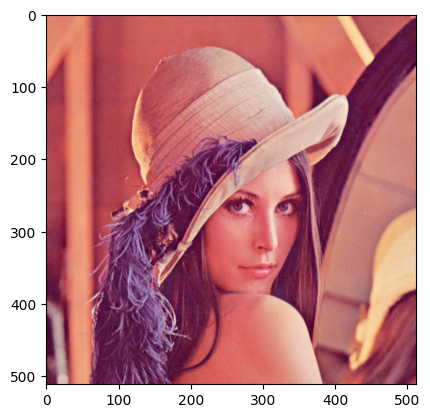

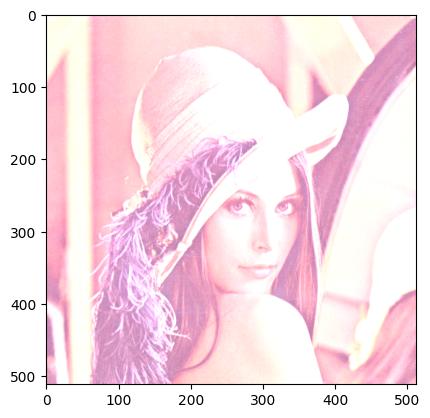

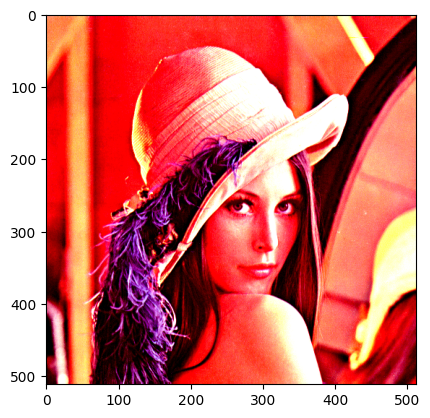

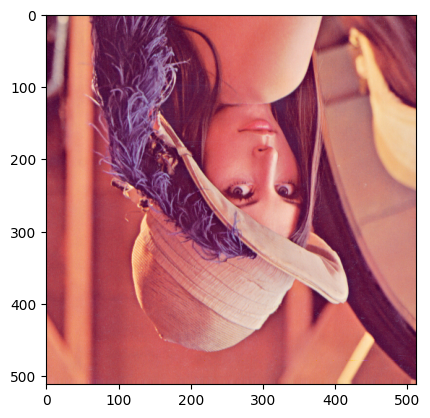

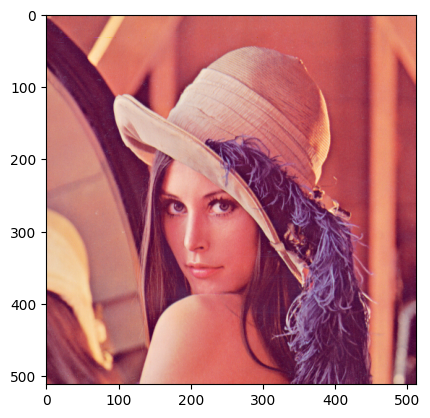

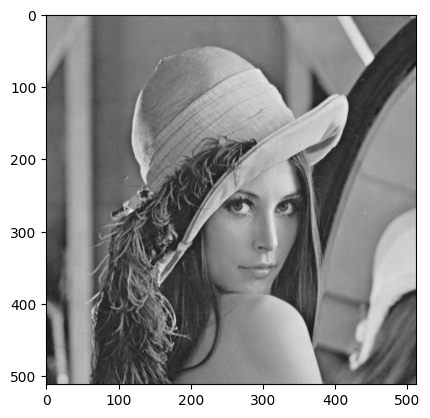

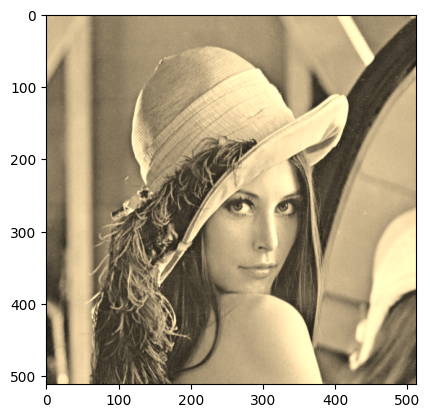

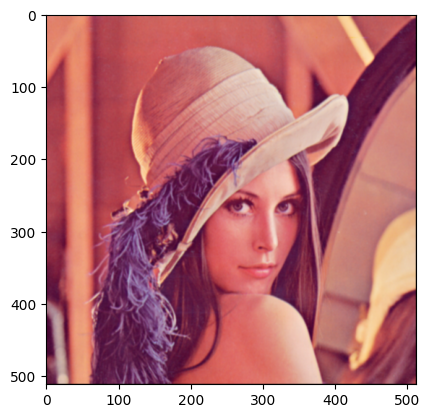

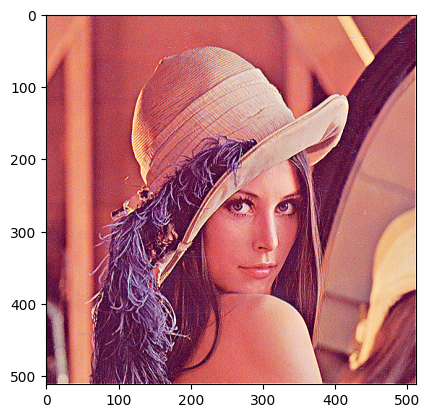

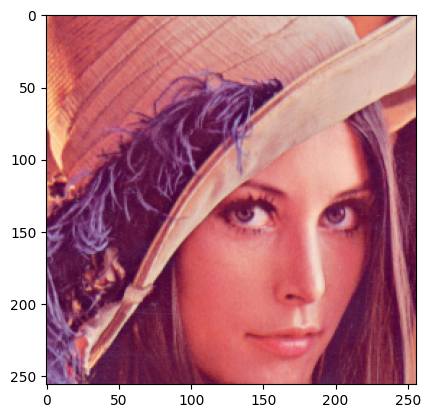

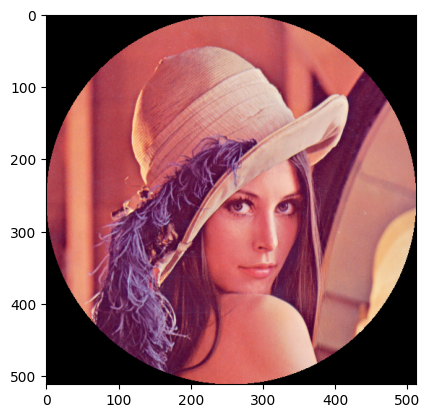

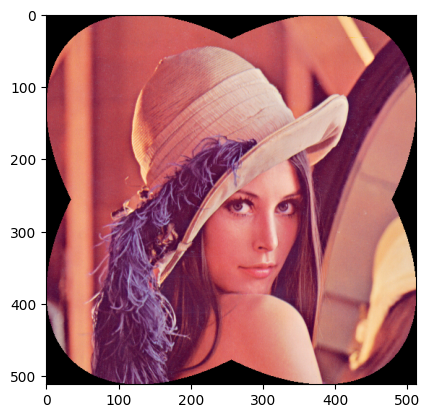

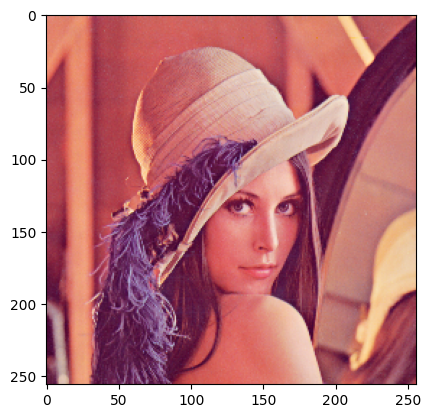

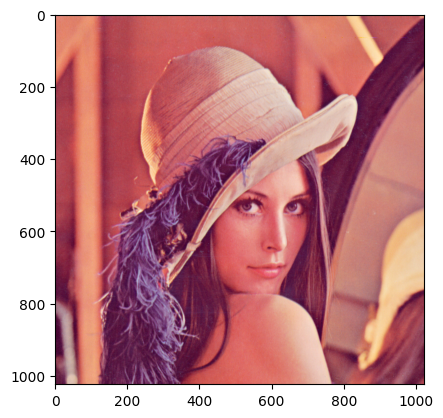

In [65]:
# Call main function
main()